Run 1: Value = 3932.0, Total Weight = 1497.0
Run 2: Value = 4123.0, Total Weight = 1500.0
Run 3: Value = 2915.0, Total Weight = 1594.0
Run 4: Value = 3792.0, Total Weight = 1499.0
Run 5: Value = 3847.0, Total Weight = 1498.0
Run 6: Value = 4067.0, Total Weight = 1500.0
Run 7: Value = 3969.0, Total Weight = 1500.0
Run 8: Value = 3943.0, Total Weight = 1500.0
Run 9: Value = 3933.0, Total Weight = 1498.0
Run 10: Value = 3368.0, Total Weight = 1659.0
Run 11: Value = 3879.0, Total Weight = 1497.0
Run 12: Value = 4112.0, Total Weight = 1490.0
Run 13: Value = 3208.0, Total Weight = 1668.0
Run 14: Value = 3999.0, Total Weight = 1499.0
Run 15: Value = 3009.0, Total Weight = 1604.0
Run 16: Value = 2916.0, Total Weight = 1551.0
Run 17: Value = 3866.0, Total Weight = 1500.0
Run 18: Value = 4067.0, Total Weight = 1500.0
Run 19: Value = 3998.0, Total Weight = 1500.0
Run 20: Value = 4102.0, Total Weight = 1492.0
Run 21: Value = 3922.0, Total Weight = 1498.0
Run 22: Value = 4179.0, Total Weight = 1489

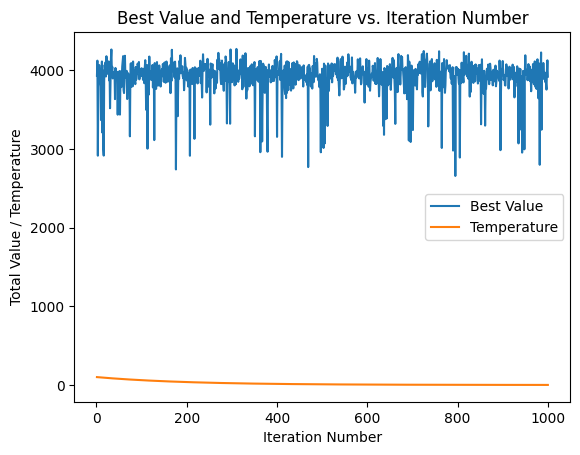

In [6]:
# import required modules
import csv
import random
import math
import matplotlib.pyplot as plt
import pandas as pd

# read the data from CSV data file
def read_data(filename):
    data = pd.read_csv(filename)
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # skip the first row of headings
        data = list(reader)
    return [(float(row[0]), float(row[1])) for row in data]

# calculate the total value of a given order of items
def calculate_total_value(items, order):
    total_value = 0
    for i in range(len(order)):
        if order[i] == 1:
            total_value += items[i][1]  # assuming value is stored at index 1 of each item
    return total_value

# calculate the total weight of a given order of items
def calculate_total_weight(items, order):
    total_weight = 0
    for i in range(len(order)):
        if order[i] == 1:
            total_weight += items[i][0]  # assuming weight is stored at index 0 of each item
    return total_weight

# Calculate the acceptance probability based on the temperature and the difference in values
def acceptance_probability(current_value, new_value, temperature):
    if new_value > current_value:
        return 1.0
    return math.exp((new_value - current_value) / temperature)

# Perform Simulated Annealing for the knapsack problem
def simulated_annealing_knapsack(items, initial_order, temperature, cooling_rate, capacity):
    current_order = initial_order[:]
    best_order = current_order[:]
    best_value = calculate_total_value(items, current_order)

    while temperature > 0.1:
        # Generate a neighbouring solution by randomly flipping one item
        neighbour = current_order[:]
        index = random.randint(0, len(items) - 1)
        neighbour[index] = 1 - neighbour[index]

        current_value = calculate_total_value(items, current_order)
        neighbour_value = calculate_total_value(items, neighbour)

        # Check if the neighbour exceeds the capacity constraint
        neighbour_weight = calculate_total_weight(items, neighbour)
        if neighbour_weight <= capacity:
            # Accept the neighbouring solution if it improves the value or by a probability
            if neighbour_value > current_value or random.random() < acceptance_probability(current_value, neighbour_value, temperature):
                current_order = neighbour[:]

            # Update the best solution if necessary
            if neighbour_value > best_value:
                best_order = neighbour[:]
                best_value = neighbour_value

        # Cool down the temperature
        temperature *= cooling_rate

    return best_order

# Run the algorithm multiple times and return the best orders
def run_algorithm(items, num_runs, initial_temperature, cooling_rate, capacity):
    best_orders = []
    for _ in range(num_runs):
        initial_order = [random.randint(0, 1) for _ in range(len(items))]
        best_order = simulated_annealing_knapsack(items, initial_order, initial_temperature, cooling_rate, capacity)
        best_orders.append(best_order)
    return best_orders

if __name__ == '__main__':
    # Define the input filename, number of runs, initial temperature, cooling rate, capacity, and minimum temperature
    filename = 'knapsack.csv'
    num_runs = 1000
    initial_temperature = 100.0
    cooling_rate = 0.995
    capacity = 1500
    min_temperature = 0.005
    # Read the data from the file
    items = read_data(filename)

    # Run the algorithm and get the best orders
    best_orders = run_algorithm(items, num_runs, initial_temperature, cooling_rate, capacity)

    # Print the results for each run
    for i, order in enumerate(best_orders):
        value = calculate_total_value(items, order)
        weight = calculate_total_weight(items, order)
        print(f'Run {i + 1}: Value = {value}, Total Weight = {weight}')
    print(f'Max Temp:{initial_temperature} | Min Temp:{min_temperature}| alpha:{cooling_rate} |Total Iterations:{num_runs}')

    # Plot the best value and temperature against the number of iterations
    best_values = []
    temperatures = []
    for i, order in enumerate(best_orders):
        value = calculate_total_value(items, order)
        weight = calculate_total_weight(items, order)
        best_values.append(value)
        temperatures.append(initial_temperature * cooling_rate ** i)

    plt.plot(range(1, num_runs + 1), best_values, label='Best Value')
    plt.plot(range(1, num_runs + 1), temperatures, label='Temperature')
    plt.xlabel('Iteration Number')
    plt.ylabel('Total Value / Temperature')
    plt.title('Best Value and Temperature vs. Iteration Number')
    plt.legend()
    plt.show()